<a href="https://colab.research.google.com/github/SanghunOh/test_machinelearning/blob/main/wholesalecumter_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
!ls -l

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [24]:
!pwd

/content


In [25]:
!ls -l ./sample_data

total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Jun 15 13:37 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Jun 15 13:37 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Jun 15 13:37 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Jun 15 13:37 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [26]:
!ls -l ./Wholesale_customers_data.csv

-rw-r--r-- 1 root root 15021 Jul  2 04:45 ./Wholesale_customers_data.csv


In [12]:
import pandas as pd
df = pd.read_csv('./files/Wholesale customers data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [13]:
X = df.iloc[:,:]

In [14]:
X.shape

(440, 8)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [16]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=5)

In [17]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [18]:
kmeans.labels_

array([4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0,
       0, 1, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4,
       4, 4, 4, 1, 4, 4, 0, 0, 4, 4, 0, 0, 1, 4, 0, 0, 4, 1, 4, 4, 0, 1,
       0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 4, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 1, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 2, 4, 4, 2, 4,

In [19]:
df['label'] = kmeans.labels_

In [20]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,4


<AxesSubplot:xlabel='Milk', ylabel='Frozen'>

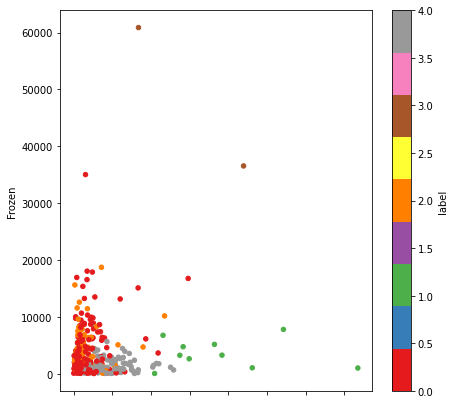

In [21]:
df.plot(kind='scatter', x='Milk', y='Frozen', c='label', cmap='Set1', figsize=(7,7))

In [22]:
# for ...:
#   if ~((df['label'] == 0) | (df['label'] == 4)):
dfx = df[~((df['label'] == 0) | (df['label'] == 4))]
df.shape, dfx.shape

((440, 9), (104, 9))

<AxesSubplot:xlabel='Milk', ylabel='Frozen'>

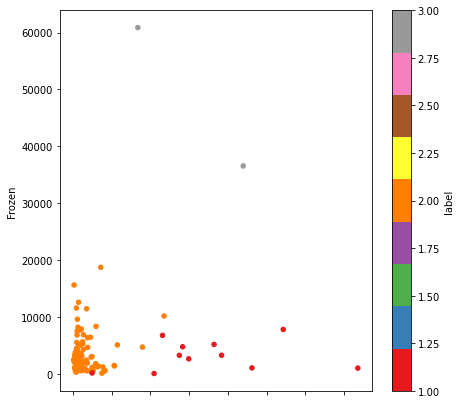

In [23]:
dfx.plot(kind='scatter', x='Milk', y='Frozen', c='label', cmap='Set1', figsize=(7,7))

In [24]:
df.to_excel('./wholesale.xls')

<ipython-input-24-c2ef9e18a5ea>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel('./wholesale.xls')
